# Análise Bidimensional

## Introdução
A análise bidimensional examina a relação entre duas ou mais variáveis aleatórias, representadas em uma matriz de dados. As linhas correspondem aos indivíduos e as colunas, às variáveis. Por exemplo, uma matriz com n indivíduos e p variáveis apresenta np dados.

O objetivo principal é explorar relações entre variáveis (colunas) ou indivíduos (linhas), similar à análise de uma variável, mas considerando agora distribuições conjuntas para compreender os padrões nos dados.

---

## Exemplos e Contextos
Quando há dois conjuntos de dados relacionados, como temperaturas de duas cidades ao longo dos mesmos meses, ou salários de casados e solteiros, podem-se aplicar técnicas de análise diferentes para investigar as associações. A organização dos dados pode ser ajustada conforme o objetivo, como agrupar os dados de acordo com características específicas.

Por exemplo:
- Comparar salários entre casados e solteiros.
- Examinar dados como superfície, população e densidade populacional (CD-Brasil) ou variáveis ambientais (CD-Poluição).

---

## Tipos de Relações
A análise bidimensional considera três cenários principais:
1. **Duas variáveis qualitativas**: Analisadas com tabelas de contingência, que mostram as frequências de combinações entre categorias.
2. **Duas variáveis quantitativas**: Utilizam-se gráficos como dispersão ou quantis para observar padrões e relações.
3. **Uma variável qualitativa e outra quantitativa**: Analisa-se o comportamento da variável quantitativa categorizada pelos atributos da variável qualitativa.

---

## Métodos e Objetivos
Os métodos de análise incluem:
- **Gráficos**: Como dispersão ou tabelas.
- **Medidas numéricas**: Para avaliar associações.

O objetivo é identificar associações entre variáveis, ou seja, verificar como o comportamento de uma variável muda com a informação sobre outra. 


---

---

### Exercício: Análise Bidimensional de Dados

Objetivo: Realizar uma análise bidimensional envolvendo três casos:

- Duas variáveis qualitativas (por exemplo, gênero e estado civil).
- Duas variáveis quantitativas (por exemplo, idade e altura).
- Uma variável qualitativa e uma quantitativa (por exemplo, profissão e salário).
- 
##### Descrição:
Considere um conjunto de dados fictício com as seguintes colunas:

- Gênero (Qualitativa): Masculino ou Feminino.
- Estado Civil (Qualitativa): Casado ou Solteiro.
- Idade (Quantitativa): Idade das pessoas.
- Altura (Quantitativa): Altura das pessoas em metros.
- Profissão (Qualitativa): Engenheiro, Médico, Professor, etc.
- Salário (Quantitativa): Salário das pessoas.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
# Criação do Dataframe

data = {
    'Genero': np.random.choice(['Masculino', 'Feminino'], size=150),
    'Estado Civil': np.random.choice(['Casado', 'Solteiro', 'Viúvo'], size=150),
    'Idade': np.random.randint(18,65,size=150),
    'Altura': np.random.uniform(1.50, 2.05, size=150),
    'Profissao': np.random.choice(['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Programador'], size=150),
    'Salario': np.random.randint(1400, 18000, size=150)
}

data = pd.DataFrame(data)
data.head()

,Genero,Estado Civil,Idade,Altura,Profissao,Salario
0,Feminino,Casado,63,1.950496,Advogado,13527
1,Masculino,Viúvo,42,1.591537,Médico,11983
2,Masculino,Viúvo,42,1.968745,Advogado,8898
3,Masculino,Solteiro,39,1.808142,Advogado,5659
4,Masculino,Casado,26,1.962407,Médico,17664


#### Análise Variáveis Qualitativas

Uma tabela de contingência é uma tabela que organiza dados categóricos em um formato de matriz para mostrar a frequência de combinações entre duas ou mais variáveis

In [5]:
tabela_contigencia = pd.crosstab(data['Genero'], data['Estado Civil'])
tabela_contigencia

Estado Civil,Casado,Solteiro,Viúvo
Genero,,,
Feminino,24,23,19
Masculino,29,25,30


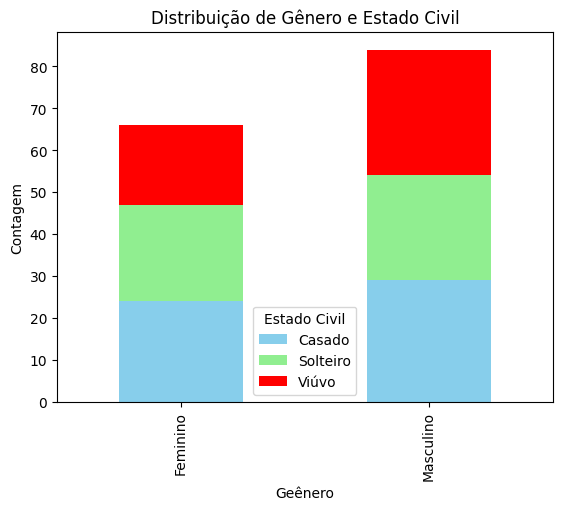

In [9]:
tabela_contigencia.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'red'])
plt.title("Distribuição de Gênero e Estado Civil")
plt.xlabel("Geênero")
plt.ylabel("Contagem")
plt.show()

#### Análise Variáveis Quantitativas

Pelo coeficiente de correlação e o grafico de dispersão, é possível concluir que não há correlação entre Idade e Altura

In [10]:
correlacao, _ = pearsonr(data['Idade'], data['Altura'])
print(f"Correlação de Pearson entre Idade e Altura: {correlacao:.2f}")

Correlação de Pearson entre Idade e Altura: -0.03


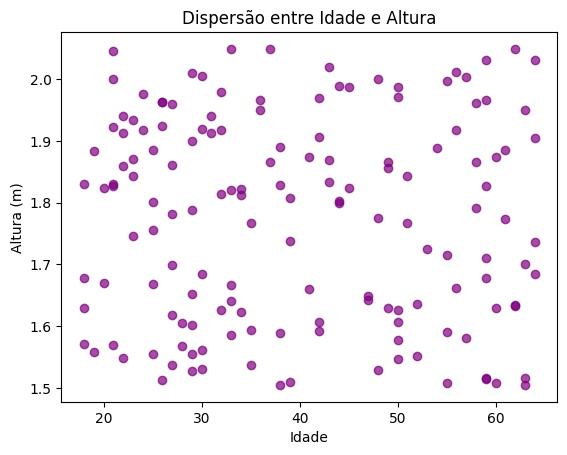

In [14]:
plt.scatter(data['Idade'], data['Altura'], alpha=0.7, color='purple')
plt.title("Dispersão entre Idade e Altura")
plt.xlabel("Idade")
plt.ylabel("Altura (m)")
plt.show()

#### Análise entre Variável Qualitativa e Quantitativa

In [19]:
salario_por_profissao= data.groupby('Profissao')['Salario'].agg(['mean', 'std'])
print("Média e Desvio Padrão de Salário por Profissão:")
print(salario_por_profissao.to_string(formatters={
    'mean': '{:.2f}'.format,  
    'std': '{:.2f}'.format    
}))

Média e Desvio Padrão de Salário por Profissão:
                mean     std
Profissao                   
Advogado     8196.52 4844.61
Engenheiro   7919.61 4387.07
Médico      10400.17 4514.42
Professor    9855.55 4681.61
Programador  9672.30 4971.56


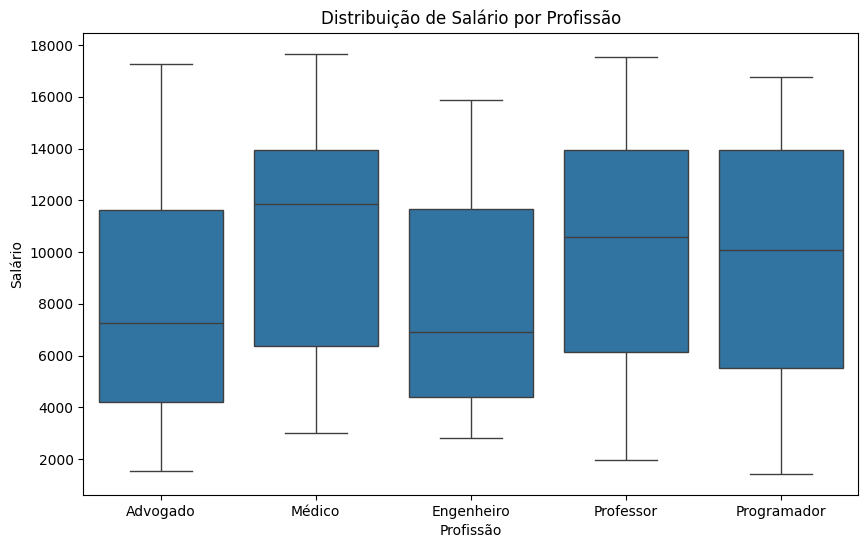

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Profissao', y='Salario', data=data)
plt.title("Distribuição de Salário por Profissão")
plt.xlabel("Profissão")
plt.ylabel("Salário")
plt.show()